In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
xls = pd.read_excel(r"D:\Notes\Resume\Data\Copy of Case study data.xlsx", sheet_name = None)

In [3]:
xls["Application_data"] = xls["Application_data"].drop('Unnamed: 8', axis = 1)
xls["Application_data"] = xls["Application_data"].drop('Unnamed: 9', axis = 1)

In [4]:
xls["Application_data"]

,cust_id,current_address_type,user_reported_pin,aadhaar_pincode,aadhaar_dob,aadhaar_dob_year,aadhaar_city,estimated_income_range
0,1,Home with family,110094.0,110094.0,1998-04-05 00:00:00,1998.0,delhi,50000.0
1,2,Rented with friends,201009.0,209625.0,1995-09-07 00:00:00,1995.0,Farrukhabad,0.0
2,3,Home with family,122001.0,122001.0,1996-11-02 00:00:00,1996.0,Gurgaon,16000.0
3,4,Hostel/PG,110036.0,121010.0,14/07/00,2000.0,Faridabad,16000.0
4,5,Home with family,121003.0,121002.0,17/05/98,1998.0,Faridabad,0.0
5,6,Rented with friends,201102.0,201102.0,1988-01-01 00:00:00,1988.0,GHaziabad,50000.0
6,7,Rented with friends,201301.0,243639.0,1992-07-03 00:00:00,1992.0,Budaun,16000.0
7,8,Home with family,122016.0,110061.0,20/07/92,1992.0,South west delhi,16000.0
8,9,Hostel/PG,250001.0,201001.0,19/05/98,1998.0,Ghaziabad,50000.0
9,10,Home with family,201301.0,201304.0,19/09/98,1998.0,Gautam Buddha Nagar,50000.0


In [5]:
df_rent = xls['Rental data'][['cust_id' , 'deposit_amt']]
df_rent

,cust_id,deposit_amt
0,1,NaN
1,2,NaN
2,3,66068.0
3,4,58005.9
4,5,19675.1
5,6,17907.2
6,7,40401.3
7,8,10355.3
8,9,0.0
9,10,22177.1


In [6]:
index = df_rent.set_index('cust_id').index.get_loc(1202)
index

1201

In [7]:
df_rent["Income_range"] = ""
for i in xls["Application_data"]['cust_id']:
    ind2 = df_rent[df_rent["cust_id"] == i].index[0]
    #ind2 = df_rent.loc[df_rent["cust_id"] == i].index[0]
    #ind2 = df_rent.set_index('cust_id').index.get_loc(i)
    #ind  = xls["Application_data"].loc[xls["Application_data"]["cust_id"] == i].index[0]
    ind  = xls["Application_data"][xls["Application_data"]["cust_id"] == i].index[0]
    #ind  = xls["Application_data"].set_index('cust_id').index.getloc(i)
    #xls["Application_data"].Deposit[ind] = df_rent.deposit[ind2]
    df_rent.Income_range[ind2] = xls["Application_data"].estimated_income_range[ind]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_ob

In [8]:
df_rent['Income_range'].replace("" , np.nan , inplace = True )
df_rent.dropna(inplace = True)
df_rent = df_rent[df_rent.deposit_amt != 0]
df_rent = df_rent[df_rent.Income_range != 0]
df_rent["Ratio"] = df_rent["deposit_amt"]/df_rent['Income_range']
df_rent.describe()

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cust_id,deposit_amt,Income_range,Ratio
count,476.000000,4.760000e+02,476.000000,476.000000
mean,511.367647,2.397090e+04,29432.966218,6.657218
std,259.845017,7.079990e+04,18574.792133,67.117701
min,3.000000,5.950000e+01,16.680000,0.001750
25%,335.750000,8.812050e+03,16000.000000,0.285974
50%,531.000000,1.458660e+04,16000.000000,0.613972
75%,742.250000,2.302645e+04,50000.000000,1.072458
max,997.000000,1.330000e+06,177116.960000,1332.452038


In [9]:
# Removing Outliers using percentile
filt_df = df_rent.loc[:, df_rent.columns != 'cust_id']
low = .02
high = .98
quant_df = filt_df.quantile([low, high])
print(quant_df)
filt_df = filt_df.apply(lambda x: x[(x >= quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)
filt_df = pd.concat([df_rent.loc[:,'cust_id'], filt_df], axis=1)
filt_df.dropna(inplace=True)
filt_df.describe()

      deposit_amt  Income_range      Ratio
0.02      1170.80        1324.3   0.048178
0.98     80287.25       50000.0  15.991780


,cust_id,deposit_amt,Income_range,Ratio
count,439.000000,439.000000,439.000000,439.000000
mean,528.863326,17945.275171,29118.700410,0.867465
std,254.274785,13430.943299,16132.689017,1.040353
min,3.000000,1188.600000,1373.320000,0.052088
25%,367.500000,9216.200000,16000.000000,0.293842
50%,547.000000,14600.100000,16000.000000,0.606091
75%,753.500000,22466.550000,50000.000000,1.024625
max,997.000000,78635.100000,50000.000000,10.714373


In [10]:
sorted_df = filt_df.sort_values( by = "Ratio" )
sorted_df

,cust_id,deposit_amt,Income_range,Ratio
863,864,2604.4,50000.00,0.052088
657,658,2792.6,50000.00,0.055852
754,755,1962.7,34000.00,0.057726
798,799,2996.8,50000.00,0.059936
578,579,2996.8,50000.00,0.059936
512,513,3413.1,50000.00,0.068262
513,514,3425.3,50000.00,0.068506
501,502,3552.4,50000.00,0.071048
333,334,1188.6,16000.00,0.074287
54,55,3766.2,50000.00,0.075324


In [11]:
sum = 0
customers = []
for i in sorted_df["deposit_amt"]:
    if (sum > 3000000):
        break
    sum = sum + i
    index = sorted_df[sorted_df["deposit_amt"] == i].index[0]
    customer_id = sorted_df.cust_id[index]
    customers.append(customer_id)
    #print(sum)
    
ind = sorted_df[sorted_df["deposit_amt"] == i].index[0]
print("Last index" ,ind)
print ("List of customers -", customers)
print ("No. of customers given loan = ", len(customers))

Last index 23
List of customers - [864, 658, 755, 799, 799, 513, 514, 502, 334, 55, 818, 71, 84, 769, 766, 581, 487, 610, 19, 524, 313, 737, 786, 832, 510, 420, 264, 78, 810, 376, 653, 746, 398, 820, 297, 508, 794, 780, 720, 735, 607, 379, 881, 91, 526, 583, 801, 582, 401, 42, 525, 83, 866, 609, 632, 779, 318, 92, 724, 892, 813, 108, 383, 757, 37, 507, 90, 369, 371, 753, 656, 547, 738, 773, 454, 266, 113, 410, 772, 764, 664, 803, 654, 46, 403, 395, 718, 305, 770, 356, 701, 765, 768, 52, 372, 707, 425, 11, 736, 736, 819, 463, 26, 861, 558, 889, 523, 478, 821, 811, 788, 424, 560, 670, 489, 486, 883, 565, 504, 705, 812, 459, 43, 600, 115, 708, 723, 547, 888, 446, 455, 386, 612, 388, 394, 625, 865, 798, 689, 729, 880, 6, 574, 521, 118, 847, 412, 57, 678, 82, 69, 492, 722, 827, 850, 842, 650, 328, 522, 30, 663, 561, 836, 576, 774, 482, 826, 802, 536, 362, 74, 702, 340, 360, 745, 710, 10, 21, 975, 351, 417, 727, 277, 603, 491, 601, 80, 891, 553, 423, 397, 822, 12, 626, 854, 416, 359, 703, 79

In [21]:
# Writing results in excel file
cust = map(int, customers)
import xlwt
from tempfile import TemporaryFile
book = xlwt.Workbook()
sheet1 = book.add_sheet("Cust_ID")

for i,e in enumerate(cust):
    sheet1.write(i,1,e)
name = "Aviral_RedCarpet.xls"
book.save(name)
book.save(TemporaryFile())

In [12]:
sorted_df.sum()

cust_id         2.321710e+05
deposit_amt     7.877976e+06
Income_range    1.278311e+07
Ratio           3.808170e+02
dtype: float64

In [13]:
xls["Rental data"].sum()

cust_id                           727821.0
airconditioningtypeid                 73.0
architecturalstyletypeid               0.0
basementsqft                        4276.0
bathroomcnt                         2062.5
bedroomcnt                          3025.0
buildingclasstypeid                  240.0
buildingqualitytypeid                392.0
calculatedbathnbr                   2062.5
calculatedfinishedsquarefeet     2331638.0
finishedsquarefeet12             1825955.0
finishedsquarefeet13               14232.0
finishedsquarefeet15              476110.0
finishedsquarefeet50             1136720.0
finishedsquarefeet6                15341.0
fullbathcnt                         1935.0
roomcnt                             5420.0
floor                               1233.0
fireplaceflag                          0.0
deposit_amt                     22907592.2
dtype: float64

Text(0, 0.5, 'Frequency')

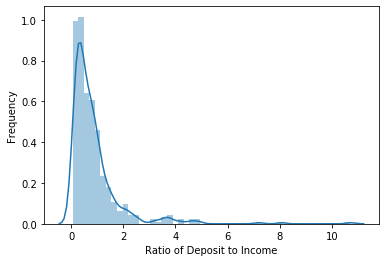

In [14]:
import seaborn as sb
sb.distplot(sorted_df.Ratio)
plt.xlabel("Ratio of Deposit to Income")
plt.ylabel("Frequency")

In [17]:
loan_df = sorted_df.iloc[0:250 ,:]
profit = 0.05
loan_df['CLV'] = loan_df['deposit_amt']*0.05/1.07
loan_df

sb.distplot(loan_df.Ratio)
plt.xlabel("Ratio of Deposit to Income")
plt.ylabel("Frequency")



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cust_id,deposit_amt,Income_range,Ratio,CLV
863,864,2604.4,50000.00,0.052088,121.700935
657,658,2792.6,50000.00,0.055852,130.495327
754,755,1962.7,34000.00,0.057726,91.714953
798,799,2996.8,50000.00,0.059936,140.037383
578,579,2996.8,50000.00,0.059936,140.037383
512,513,3413.1,50000.00,0.068262,159.490654
513,514,3425.3,50000.00,0.068506,160.060748
501,502,3552.4,50000.00,0.071048,166.000000
333,334,1188.6,16000.00,0.074287,55.542056
54,55,3766.2,50000.00,0.075324,175.990654


In [18]:
loan_df.to_excel(r'D:\Notes\Resume\Data\Red Carpet\Q1.xlsx', index = False , header = True)

In [19]:
# Assuming delinquency rate of 10% - bottom 10% i.e 25 loans will defaulted
# Additional Cost = 300*25 = 7500 
# Money spent = 11,76,500  + 7500 = 1184000
# Loan Amt Financed = 30,21,760
# Basic math  - 'All loans 1 year , interest rate  = 39 %'
#               'No downpayment is required , company's own money                                    
# Decide rate based on credit score 

In [20]:
sum = 0
customers = []
for i in sorted_df["deposit_amt"]:
    if (sum > 5000000):
        break
    sum = sum + i
    index = sorted_df[sorted_df["deposit_amt"] == i].index[0]
    customer_id = sorted_df.cust_id[index]
    customers.append(customer_id)
    #print(sum)
    
ind = sorted_df[sorted_df["deposit_amt"] == i].index[0]
print("Last index" ,ind)
print ("List of customers -", customers)
print ("No. of customers given loan = ", len(customers))

Last index 583
List of customers - [864, 658, 755, 799, 799, 513, 514, 502, 334, 55, 818, 71, 84, 769, 766, 581, 487, 610, 19, 524, 313, 737, 786, 832, 510, 420, 264, 78, 810, 376, 653, 746, 398, 820, 297, 508, 794, 780, 720, 735, 607, 379, 881, 91, 526, 583, 801, 582, 401, 42, 525, 83, 866, 609, 632, 779, 318, 92, 724, 892, 813, 108, 383, 757, 37, 507, 90, 369, 371, 753, 656, 547, 738, 773, 454, 266, 113, 410, 772, 764, 664, 803, 654, 46, 403, 395, 718, 305, 770, 356, 701, 765, 768, 52, 372, 707, 425, 11, 736, 736, 819, 463, 26, 861, 558, 889, 523, 478, 821, 811, 788, 424, 560, 670, 489, 486, 883, 565, 504, 705, 812, 459, 43, 600, 115, 708, 723, 547, 888, 446, 455, 386, 612, 388, 394, 625, 865, 798, 689, 729, 880, 6, 574, 521, 118, 847, 412, 57, 678, 82, 69, 492, 722, 827, 850, 842, 650, 328, 522, 30, 663, 561, 836, 576, 774, 482, 826, 802, 536, 362, 74, 702, 340, 360, 745, 710, 10, 21, 975, 351, 417, 727, 277, 603, 491, 601, 80, 891, 553, 423, 397, 822, 12, 626, 854, 416, 359, 703, 7

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Frequency')

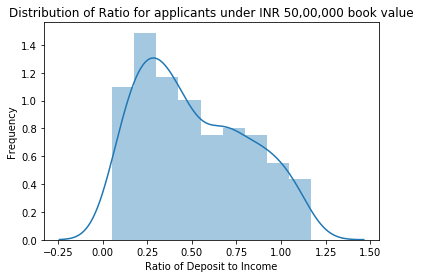

In [21]:
loan_df2 = sorted_df.iloc[0:352 ,:]
loan_df2['CLV'] = loan_df2['deposit_amt']*profit/1.07
loan_df2.to_excel(r'D:\Notes\Resume\Data\Red Carpet\Q3a.xlsx', index = False , header = True)
sb.distplot(loan_df2.Ratio)
plt.title("Distribution of Ratio for applicants under INR 50,00,000 book value")
plt.xlabel("Ratio of Deposit to Income")
plt.ylabel("Frequency")

In [22]:
sum = 0
customers_3 = []
for i in sorted_df["deposit_amt"]:
    if (sum > 10000000):
        break
    if (sum > 5000000 and sum < 10000000):
        index = sorted_df[sorted_df["deposit_amt"] == i].index[0]
        customer_id = sorted_df.cust_id[index]
        customers_3.append(customer_id)
    sum = sum + i
    #print(sum)
    
ind = sorted_df[sorted_df["deposit_amt"] == i].index[0]
print("Last index" ,ind)
print ("List of customers -", customers_3)
print ("No. of customers given loan = ", len(customers_3))

Last index 741
List of customers - [584, 435, 59, 734, 919, 481, 384, 436, 997, 690, 585, 715, 409, 859, 460, 500, 726, 893, 638, 830, 58, 462, 345, 464, 857, 31, 572, 39, 838, 845, 869, 474, 848, 858, 117, 338, 641, 795, 856, 852, 245, 713, 677, 261, 367, 76, 878, 781, 604, 66, 406, 484, 867, 867, 333, 70, 32, 571, 623, 279, 591, 393, 841, 308, 246, 7, 844, 451, 250, 586, 840, 260, 280, 4, 41, 309, 784, 530, 3, 110, 101, 743, 590, 27, 109, 721, 742]
No. of customers given loan =  87


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Frequency')

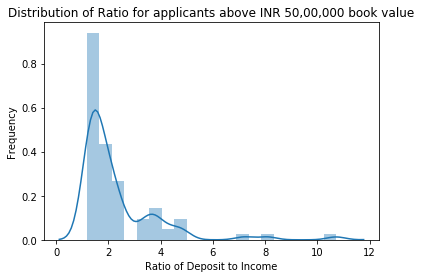

In [23]:
loan_df3 = sorted_df.iloc[352:741,:]
loan_df3['CLV'] = loan_df3['deposit_amt']*0.05/1.07
loan_df3.to_excel(r'D:\Notes\Resume\Data\Red Carpet\Q3b.xlsx', index = False , header = True)
sb.distplot(loan_df3.Ratio)
plt.title("Distribution of Ratio for applicants above INR 50,00,000 book value")
plt.xlabel("Ratio of Deposit to Income")
plt.ylabel("Frequency")

In [35]:
loan_df3.sum()

cust_id         4.339000e+04
deposit_amt     2.863471e+06
Income_range    1.395440e+06
Ratio           2.019163e+02
dtype: float64

Text(0.5, 0, 'Customers in order of increasing Dep/Inc Ratio')

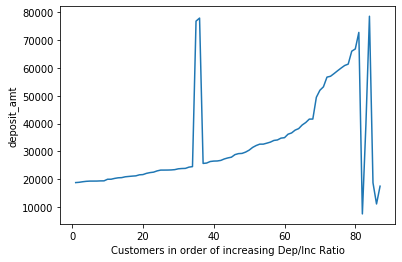

In [43]:
sb.lineplot(np.arange(1,88),loan_df3.deposit_amt)
plt.xlabel("Customers in order of increasing Dep/Inc Ratio")

In [45]:
loan_df2.sum()

cust_id         1.887810e+05
deposit_amt     5.014505e+06
Income_range    1.138767e+07
Ratio           1.789007e+02
dtype: float64